In [1]:
import numpy as np
import matplotlib.pyplot as plt

# task01
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
- zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
- ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

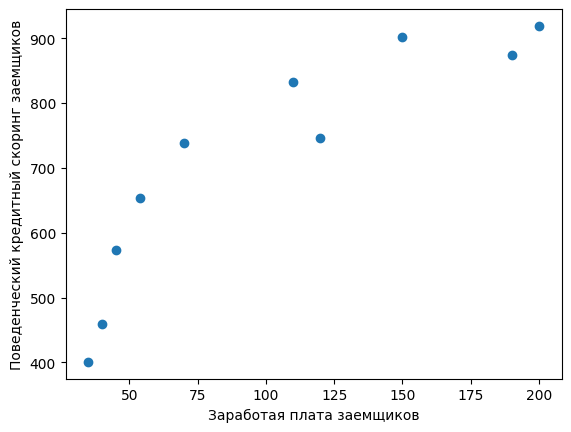

На основании графика, делаем предположение о наличии линейной взаимосвязи.
 2.621;
 444.177;


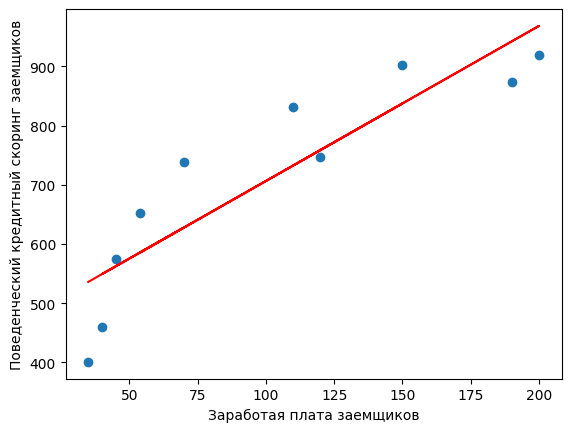

Расчет наглядно показывает линейную взаимосвязь между величиной заработной платы и значением кредитного скоринга заемщиков.


In [2]:
zp_arr = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks_arr = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

plt.scatter(zp_arr, ks_arr)
plt.xlabel('Заработая плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг заемщиков', rotation = 90)
plt.show()

print('На основании графика, делаем предположение о наличии линейной '
      'взаимосвязи.')

b = (np.mean(zp_arr * ks_arr) - np.mean(zp_arr) * np.mean(ks_arr)) \
    / (np.mean(zp_arr ** 2) - np.mean(zp_arr) ** 2)
a = np.mean(ks_arr) - b * np.mean(zp_arr)

print(f'{b: .3f};\n{a: .3f};')

plt.scatter(zp_arr, ks_arr)
plt.plot(zp_arr, a + b * zp_arr, c = 'r')
plt.xlabel('Заработая плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг заемщиков', rotation = 90)
plt.show()

print('Расчет наглядно показывает линейную взаимосвязь между величиной '
      'заработной платы и значением кредитного скоринга заемщиков.')

# task02
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [3]:
def mse_func(b, x, y):
    return np.sum((b * x - y) ** 2) / len(x)

mse_item = mse_func(b, zp_arr, ks_arr)
print(f'{mse_item: .3f}')

# производная функции потерь
def mse_loss_func(b, x, y):
    return (2 / len(x)) * np.sum((b * x - y) * x)

alpha = 1e-6
b = 0.1
mse_min = mse_func(b, zp_arr, ks_arr)
i_min = 1
b_min = b
count = 10000
for i in range(count):
    b -= alpha * mse_loss_func(b, zp_arr, ks_arr)
    if i % 100 == 0:
        print(f'--- Итерация #{i}, b = {b}, mse = '
              f'{mse_func(b, zp_arr, ks_arr)}')
    if mse_func(b, zp_arr, ks_arr) > mse_min:
        print(f'-- Итерация #{i_min}, b = {b_min}, mse = {mse_min},'
              f'\nДостигнут минимум\nРезультат = {b_min} ')
        break
    else:
        mse_min = mse_func(b, zp_arr, ks_arr)
        i_min = i
        b_min = b

 203763.939
--- Итерация #0, b = 0.25952808000000005, mse = 493237.7212546963
--- Итерация #100, b = 5.54537842245223, mse = 58151.31823171113
--- Итерация #200, b = 5.868748638669329, mse = 56522.97550129376
--- Итерация #300, b = 5.888531320728348, mse = 56516.88130936019
--- Итерация #400, b = 5.8897415574471985, mse = 56516.85850140053
--- Итерация #500, b = 5.889815595583751, mse = 56516.858416040064
--- Итерация #600, b = 5.889820124983314, mse = 56516.85841572062
-- Итерация #628, b = 5.889820285147628, mse = 56516.85841571966,
Достигнут минимум
Результат = 5.889820285147628 


# task03
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

-- Итерация #0 --
 a = 0.14197959999999998,
 b = 4.884978596113599,
 mse = 70366.2821016992
-- Итерация #50000 --
 a = 236.72655235964433,
 b = 4.147445287981601,
 mse = 17387.09579189967
-- Итерация #100000 --
 a = 347.2559075176058,
 b = 3.3339127474648516,
 mse = 8853.283372220058
-- Итерация #150000 --
 a = 398.89545333636954,
 b = 2.953828643644366,
 mse = 6990.541626266601
-- Итерация #200000 --
 a = 423.0215571081485,
 b = 2.7762525556795365,
 mse = 6583.946467915477
-- Итерация #250000 --
 a = 434.29332323191153,
 b = 2.69328863611563,
 mse = 6495.195773862671
-- Итерация #300000 --
 a = 439.5595159313502,
 b = 2.6545277194387675,
 mse = 6475.823468184463
-- Итерация #350000 --
 a = 442.0198921708081,
 b = 2.6364185381280407,
 mse = 6471.594924044105
-- Итерация #400000 --
 a = 443.16938509390076,
 b = 2.6279578907579992,
 mse = 6470.671926759022
-- Итерация #450000 --
 a = 443.70643059087314,
 b = 2.624005058617609,
 mse = 6470.470456948132
-- Итерация #500000 --
 a = 443.9573

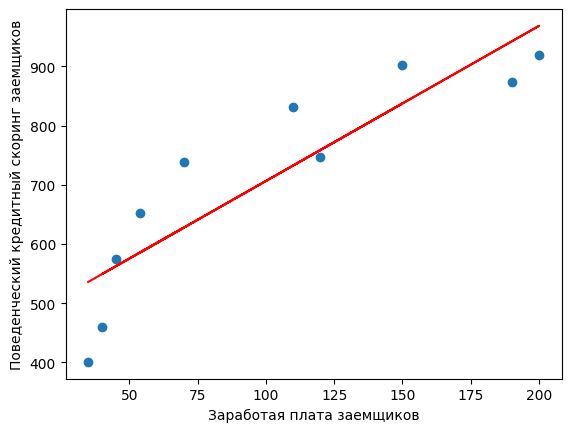

In [8]:
def mse_func(a, b, x, y):
    return np.sum(((a + b * x) - y) ** 2) / len(x)

def mse_loss_a_func(a, b, x, y):
    return 2 * np.sum((a + b * x) - y) / len(x)

def mse_loss_b_func(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

alpha = 3e-5
b = 0.1
a = 0.1
mse_ab_min = mse_func(a, b, zp_arr, ks_arr)
i_min = 1
b_min = b
a_min = a
count = 1000000
for i in range(count):
    a -= alpha * mse_loss_a_func(a, b, zp_arr, ks_arr)
    b -= alpha * mse_loss_b_func(a, b, zp_arr, ks_arr)
    if i % 50000 == 0:
        print(f'-- Итерация #{i} --\n a = {a},\n b = {b},\n'
              f' mse = {mse_func(a, b, zp_arr, ks_arr)}')
    if mse_func(a, b, zp_arr, ks_arr) > mse_ab_min:
        print(f'--- Итерация #{i_min} ---\n a = {a_min},\n b = {b_min},\n'
              f' mse = {mse_ab_min},\nДостигнут минимум.')
        break
    else:
        mse_ab_min = mse_func(a, b, zp_arr, ks_arr)
        i_min = i
        b_min = b
        a_min = a
print(f'a = {a_min}\nb = {b_min}')

plt.scatter(zp_arr, ks_arr)
plt.plot(zp_arr, a_min + b_min * zp_arr, c = 'r')
plt.xlabel('Заработая плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг заемщиков', rotation = 90)
plt.show()